In [1]:
import Pkg; Pkg.activate(".")

  Activating project at `~/Asztal/git/jeff-ball-covid`


In [3]:
#Pkg.add.(["DataFrames","CSV","PyPlot"])
using DataFrames, CSV, PyPlot

   Resolving package versions...
  No Changes to `~/Asztal/git/jeff-ball-covid/Project.toml`
  No Changes to `~/Asztal/git/jeff-ball-covid/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Asztal/git/jeff-ball-covid/Project.toml`
  No Changes to `~/Asztal/git/jeff-ball-covid/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Asztal/git/jeff-ball-covid/Project.toml`
  No Changes to `~/Asztal/git/jeff-ball-covid/Manifest.toml`
[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]


In [25]:
df = CSV.read(
  download("https://raw.githubusercontent.com/jeff-ball/Data_Covid19/main/time.csv"),
  DataFrame
)

Row,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1/20/2020,1,0,1,0,0,1,0,1,0,0
2,1/21/2020,1,0,1,0,0,0,0,0,0,0
3,1/22/2020,4,3,1,0,0,3,3,0,0,0
4,1/23/2020,22,21,1,0,0,18,18,0,0,0
5,1/24/2020,27,25,2,0,0,5,4,1,0,0
6,1/25/2020,27,25,2,0,0,0,0,0,0,0
7,1/26/2020,51,47,3,0,0,24,22,1,0,0
8,1/27/2020,61,56,4,0,0,10,9,1,0,0
9,1/28/2020,116,97,4,0,0,55,41,0,0,0


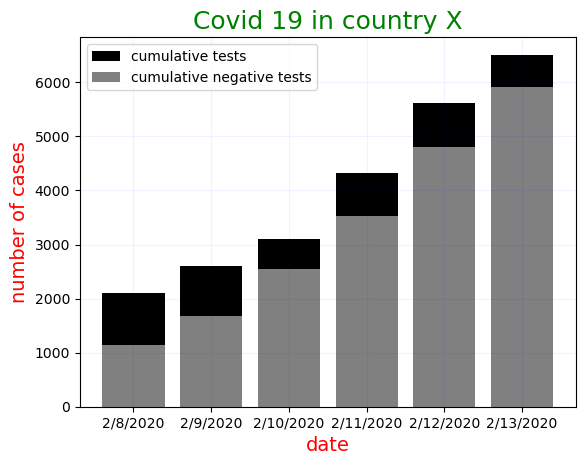

In [39]:
ax = plt.subplot()
dom=20:25
ax.bar(df.date[dom], df.acc_test[dom], label = "cumulative tests", color = :black)
ax.bar(df.date[dom], df.acc_negative[dom], label = "cumulative negative tests", color = :grey)
ax.set_title("Covid 19 in country X", fontsize = 18, color = :green)
ax.set_xlabel("date", color = :red, fontsize = 14)
ax.set_ylabel("number of cases", color = :red, fontsize = 14)
ax.legend(fontsize = 10)
ax.grid(b = 1, color = :blue, alpha = 0.05)

In [28]:
# the improving is omitted

In [67]:
function mkax(ax, x, y, info)
  ax.bar(x, y, label = info, color = :black)
  ax.set_title("$(info)", fontsize = 14, color = :green)
  ax.set_xlabel("day", color = :red, fontsize = 12)
  ax.set_ylabel(info, color = :red, fontsize = 12)
  ax.xaxis.set_ticks_position("none")
  ax.xaxis.set_tick_params(pad = 5)
  #ax.legend(fontsize = 10)
  ax.grid(b = 2, color = :blue, alpha = 0.05)
end

mkax (generic function with 1 method)

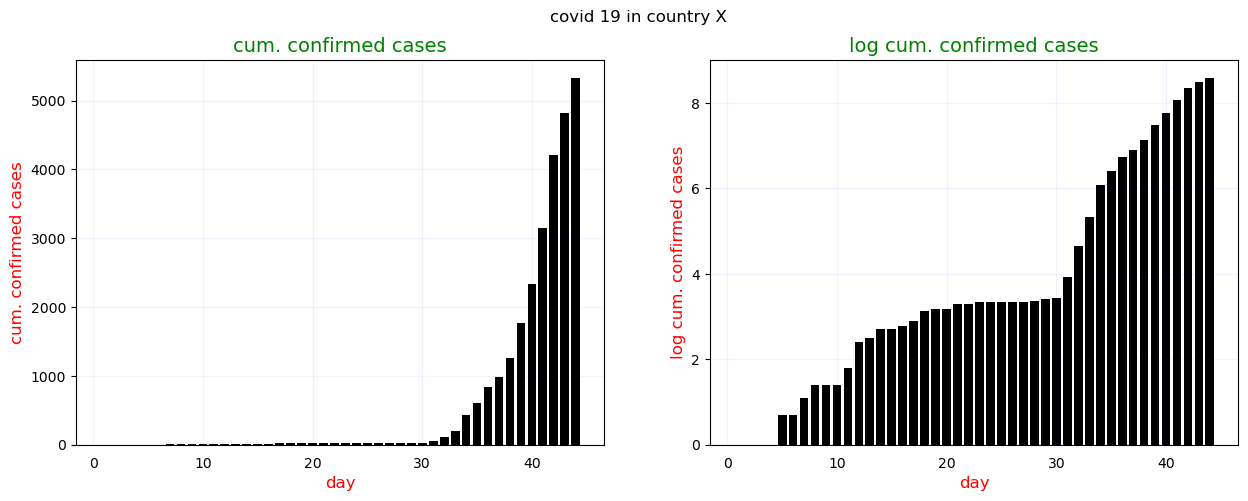

PyObject Text(0.5, 0.98, 'covid 19 in country X')

In [97]:
fig,(ax1,ax2) = plt.subplots(1,2; figsize=(15,5))
x,_ = size(df)
x = 1:x
y = df.acc_confirmed[x]
mkax(ax1, x, y, "cum. confirmed cases")
mkax(ax2, x, log.(y), "log cum. confirmed cases")
fig.suptitle("covid 19 in country X")


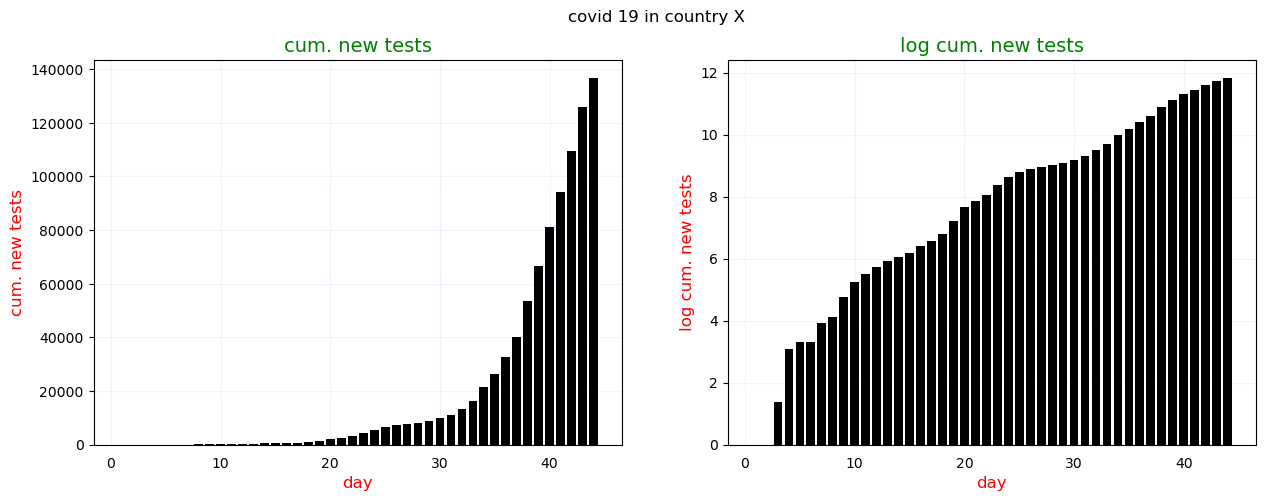

PyObject Text(0.5, 0.98, 'covid 19 in country X')

In [98]:
fig,(ax1,ax2) = plt.subplots(1,2; figsize=(15,5))
x,_=size(df)
x = 1:x
y = cumsum(df.new_test[x])
mkax(ax1, x, y, "cum. new tests")
mkax(ax2, x, log.(y), "log cum. new tests")
fig.suptitle("covid 19 in country X")


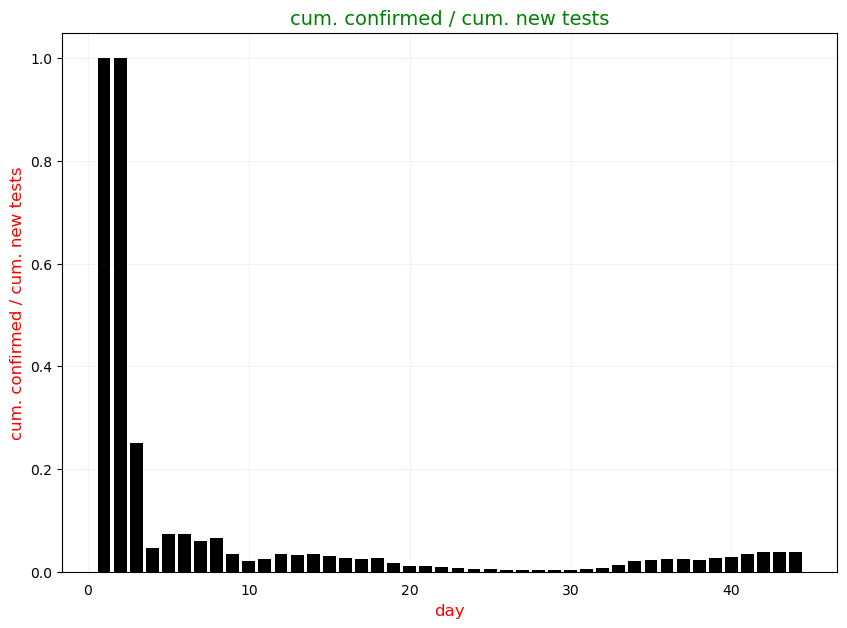

In [102]:
_, ax = plt.subplots(1,1; figsize=(10,7))
x, _ = size(df)
x = 1:x
y = df.acc_confirmed[x] ./ cumsum(df.new_test[x])
mkax(ax, x, y, "cum. confirmed / cum. new tests")
